# GRIP - The Sparks Foundation

## Data Science & Business Analytics Intern

## Author : Bhaskar Nag

 ## Task 1: Prediction Using Supervised ML
 
 


### Imported Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [2]:
data_student = pd.read_csv('StudentScore.csv', delimiter = ',')
data_student.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Visualization of Data



In [3]:
a = data_student.Hours
b = data_student.Scores

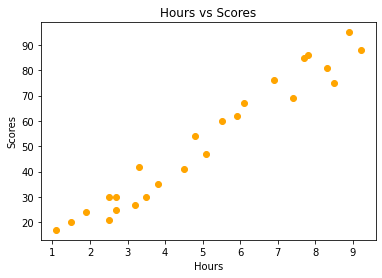

In [4]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.scatter(a,b,color='orange')

## Our Model




In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
train = data_student.drop(['Scores'], axis = 1)
test = data_student['Scores']
a_train, a_test, b_train, b_test = train_test_split(train, test, random_state = 42)

In [7]:
rgr = LinearRegression()

In [8]:
rgr.fit(a_train,b_train)

LinearRegression()

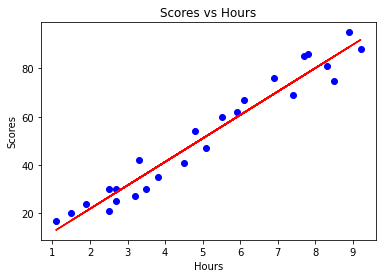

In [9]:
slope = rgr.coef_*a + rgr.intercept_
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores vs Hours")
plt.scatter(a,b,color = 'blue')
plt.plot(a,slope,color ='red')
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error as m

In [11]:
train_prediction = rgr.predict(a_train)

In [12]:
k = m(train_prediction, b_train)

In [13]:
print("Mean absolute error in test set: ",k)


Mean absolute error in test set:  5.213322648757283


In [14]:
test_prediction = rgr.predict(a_test)


In [15]:
k = m(test_prediction,b_test)

In [16]:
print("Mean absolute error in test set: ",k)

Mean absolute error in test set:  4.425394675156183


## Model testing

In [17]:
test_predict = rgr.predict(a_test)

In [18]:
test_predict

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

### Prediction score if a student studies for 9.5 hours per day.




In [19]:
prediction = rgr.predict([[9.25]])
print("Predicted score = {}".format(prediction[0]))

Predicted score = 92.33571987331146


In [20]:
diff = pd.DataFrame({'Actual Values': b_test, 'Predicted Values': test_predict})
diff['Difference'] = diff['Actual Values'] - diff['Predicted Values']
diff.head()

,Actual Values,Predicted Values,Difference
8,81,83.107332,-2.107332
16,30,26.765598,3.234402
0,21,26.765598,-5.765598
23,76,69.507603,6.492397
11,62,59.793511,2.206489


In [21]:
rgr.score(a_test,b_test)

0.9553509219739938

## So we got 95 % Accuracy in our model.
